In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import multivariate_normal as mvn

In [45]:
# Import the train data

df = pd.read_csv('/content/drive/MyDrive/Classroom/Artificial Mariachi Intelligence/James Ghosn - MNIST_train.csv')
df = df.drop(['index', 'Unnamed: 0'], axis=1)
df

,labels,0,1,2,3,4,5,6,7,8,...,774,775,776,777,778,779,780,781,782,783
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
# Check the types of the columns to make sure all are valid values

df.dtypes

labels    int64
0         int64
1         int64
2         int64
3         int64
          ...  
779       int64
780       int64
781       int64
782       int64
783       int64
Length: 785, dtype: object

In [47]:
df.shape

(60000, 785)

In [48]:
# Transfer our dataframe into an array of values
# Create the dependant variable y
# Create the independant variable X

X_train = df.to_numpy()
y_train = X_train[:,0]
X_train = X_train[:,1:]
X_train.shape, y_train.shape

((60000, 784), (60000,))

In [49]:
# Create a function that draws an example of each observation

def Number_visualization(data):
  images=[]
  for image in data:
    images.append(image.to_numpy().reshape(28,28))
    
  fig,axes=plt.subplots(2,5,figsize=(20,5))
  for (i,ax) in zip(images,axes.flatten()):
    ax.imshow(i)

In [50]:
# Create a dummy list to store the values of the examples

dummy = []
for i in range(10):
  dummy.append(df[df['labels']==i].drop('labels', axis=1).iloc[0])

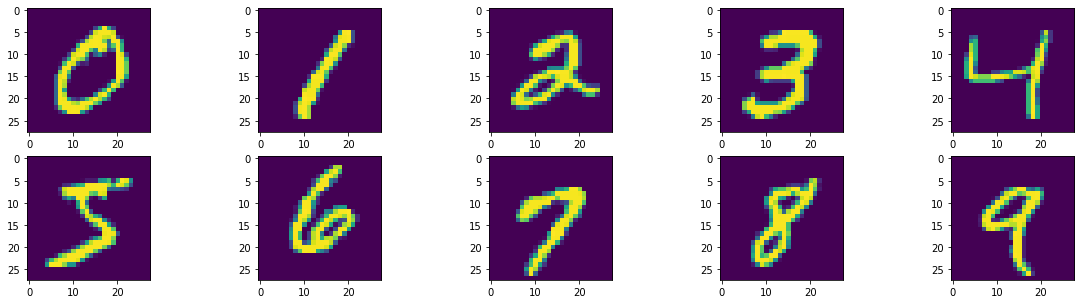

In [51]:
# Call the visualization function to draw the numbers
Number_visualization(dummy)

In [52]:
# Normailze the data using the min max method

X_train = (X_train - X_train.min())/(X_train.max() - X_train.min())

In [53]:
class GaussBayes():
  def fit(self, X, y, epsilon = 1e-3):
    self.likelihoods = dict()
    self.priors =dict()
    self.K = set(y.astype(int))

    for k in self.K:
      X_k = X[y==k,:]
      N_k, D = X_k.shape
      mu_k = X_k.mean(axis=0)

      self.likelihoods[k] = {"mean": X_k.mean(axis=0), "cov": (1/(N_k-1))*np.matmul((X_k-mu_k).T,X_k-mu_k)+epsilon*np.identity(D)}
      self.priors[k] = len(X_k)/len(X)
  def predict(self, X):
    N,D = X.shape
    P_hat = np.zeros((N, len(self.K)))

    for k, l in self.likelihoods.items():
      P_hat[:,k] = mvn.logpdf(X, l["mean"], l["cov"]) +np.log(self.priors[k])

    return P_hat.argmax(axis=1)

In [54]:
# Use the gauss bayes function to train the data

gb_train = GaussBayes()

In [55]:
# Fit the varibles into our trained function and create y_hat

gb_train.fit(X_train,y_train)
y_hat_train = gb_train.predict(X_train)

In [56]:
def accuracy(y, y_hat):
  return np.mean(y==y_hat)

Text(0.5, 42.0, 'Predicted label')

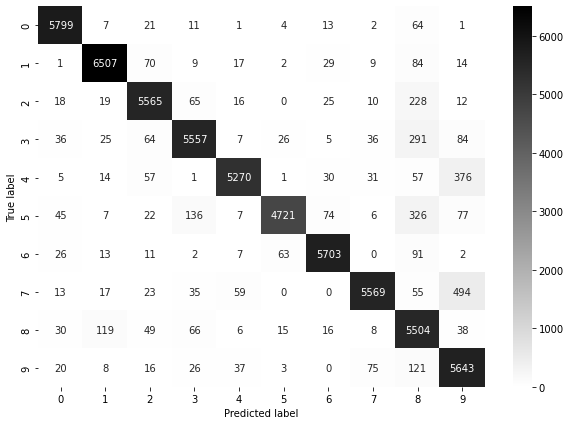

In [83]:
plt.figure(figsize=(10,7))
y_actu = pd.Series(y_train, name='Actual')
y_pred = pd.Series(y_hat_train, name='Predicted')
cm = pd.crosstab(y_actu, y_pred)
ax = sns.heatmap(cm, annot=True, fmt="d", cmap="gist_gray_r")
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [58]:
# Find the accuracy using the function

accuracy(y_train, y_hat_train)

0.9306333333333333

In [59]:
# Read the test data into a data frame

df2 = pd.read_csv('/content/drive/MyDrive/Classroom/Artificial Mariachi Intelligence/James Ghosn - MNIST_test.csv')
df2 = df2.drop(['index', 'Unnamed: 0'], axis=1)
df2

,labels,0,1,2,3,4,5,6,7,8,...,774,775,776,777,778,779,780,781,782,783
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
# Create the test independant and dependant variables

X_test = df2.to_numpy()
y_test = X_test[:,0]
X_test = X_test[:,1:]
X_test.shape, y_test.shape

((10000, 784), (10000,))

In [61]:
# Create a list to visualize an sample of each observation

dummy_test = []
for i in range(10):
  dummy_test.append(df2[df2['labels']==i].drop('labels', axis=1).iloc[0])

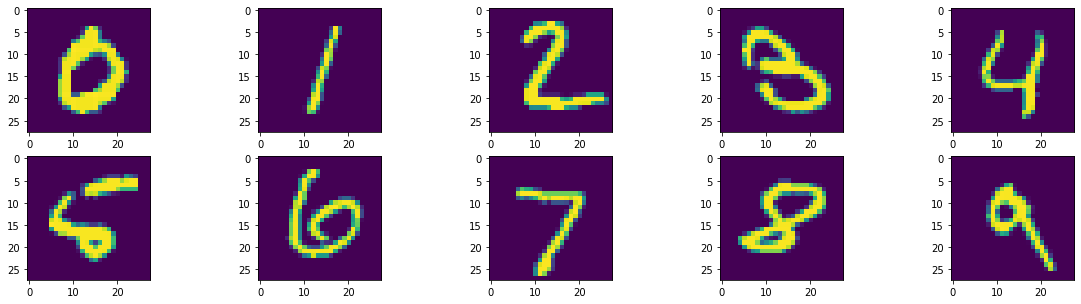

In [62]:
# Visualise the test numbers

Number_visualization(dummy_test)

In [63]:
# Normalize the test values

X_test = (X_test - X_test.min())/(X_test.max() - X_test.min())

In [64]:
# Create a prediction by using the test data on the trained model

y_hat_test = gb_train.predict(X_test)

Text(0.5, 42.0, 'Predicted label')

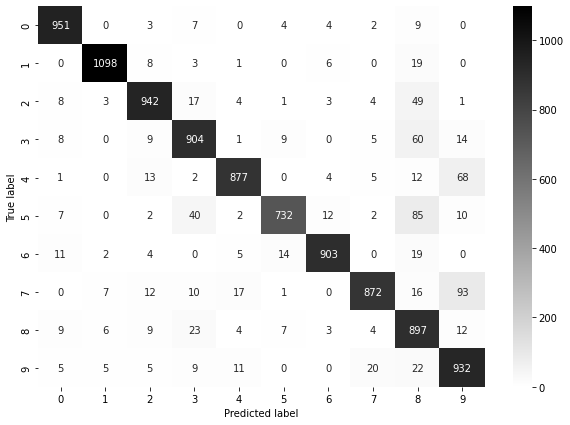

In [84]:
plt.figure(figsize=(10,7))
y_actu = pd.Series(y_test, name='Actual')
y_pred = pd.Series(y_hat_test, name='Predicted')
cm = pd.crosstab(y_actu, y_pred)
ax = sns.heatmap(cm, annot=True, fmt="d", cmap="gist_gray_r")
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [66]:
# Find the accuracy of the test data

accuracy(y_test, y_hat_test)

0.9108